In [3]:
## this script reads a pdf file and creates a word cloud

import fitz  # PyMuPDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import os
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the necessary data for tokenization
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

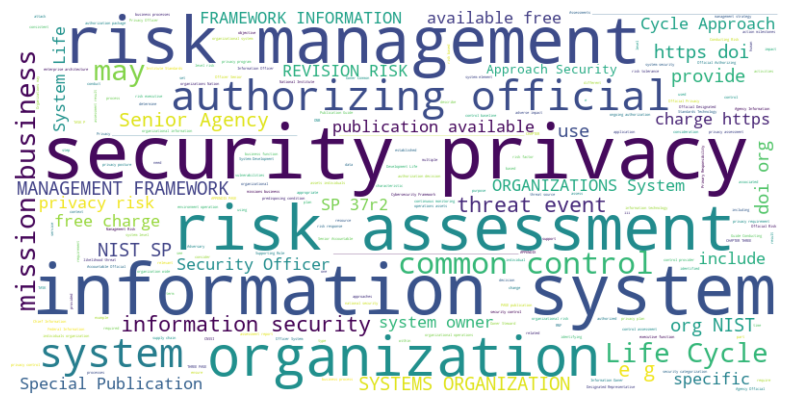

In [4]:
# Define a function for extracting text from PDFs
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

# Define a function for the word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Define a function for the removal of certain stop words and other words
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))

    # Add the word you want to manually remove
    manual_removal_list = ['NIST']

    # Remove stop words and the manually specified word
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in manual_removal_list and len(word) > 2]  # Adjust length as needed
    return ' '.join(filtered_tokens)

# Set the folder path
folder_path = '/app/notebooks/'

# Process PDFs in the folder
all_text = ""
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(folder_path, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        processed_text = tokenize_and_remove_stopwords(pdf_text)
        all_text += processed_text

# Generate word cloud from combined texts
generate_word_cloud(all_text)


In [10]:
#save the word cloud into a .png
# Save the WordCloud as a .png file
wordcloud.to_file("wordcloudFCombine.png")

In [11]:
print("Current working directory:", os.getcwd())

Current working directory: /app/notebooks


In [10]:
##To get it out of the container could be tricky
##In a Debian linux system like Ubuntu, use the 'cp' command to move it. 
##I used sudo docker cp 'containerID':/app/wordcloud.png /path/to/destination/file/wordcloud.png